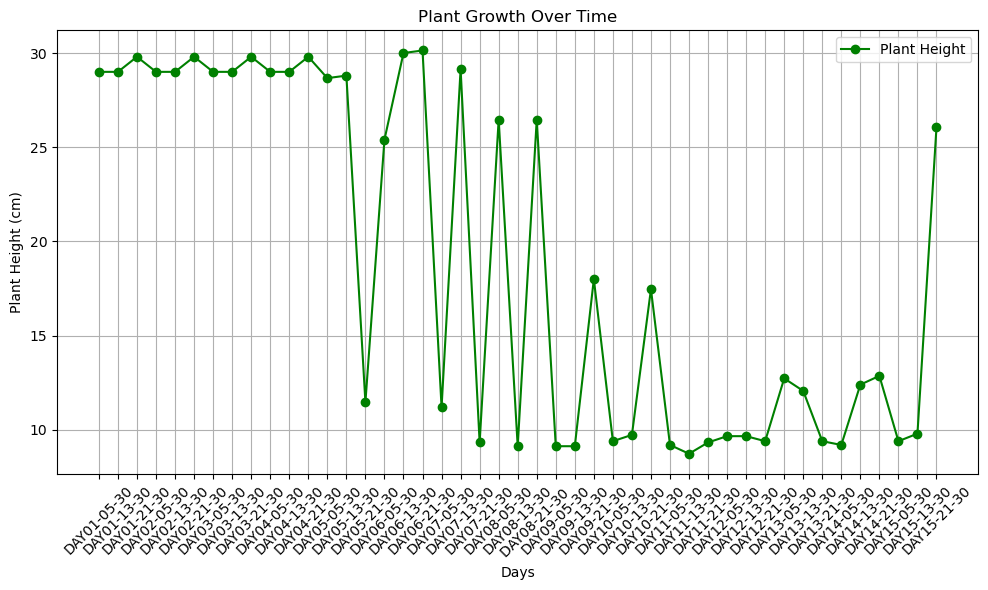

DAY01-05-30: 29.00 cm
DAY01-13-30: 29.00 cm
DAY01-21-30: 29.80 cm
DAY02-05-30: 29.00 cm
DAY02-13-30: 29.00 cm
DAY02-21-30: 29.80 cm
DAY03-05-30: 29.00 cm
DAY03-13-30: 29.00 cm
DAY03-21-30: 29.80 cm
DAY04-05-30: 29.00 cm
DAY04-13-30: 29.00 cm
DAY04-21-30: 29.80 cm
DAY05-05-30: 28.67 cm
DAY05-13-30: 28.80 cm
DAY05-21-30: 11.47 cm
DAY06-05-30: 25.40 cm
DAY06-13-30: 30.00 cm
DAY06-21-30: 30.13 cm
DAY07-05-30: 11.20 cm
DAY07-13-30: 29.13 cm
DAY07-21-30: 9.33 cm
DAY08-05-30: 26.47 cm
DAY08-13-30: 9.13 cm
DAY08-21-30 : 26.47 cm
DAY09-05-30: 9.13 cm
DAY09-13-30: 9.13 cm
DAY09-21-30: 18.00 cm
DAY10-05-30: 9.40 cm
DAY10-13-30: 9.73 cm
DAY10-21-30: 17.47 cm
DAY11-05-30: 9.20 cm
DAY11-13-30: 8.73 cm
DAY11-21-30: 9.33 cm
DAY12-05-30: 9.67 cm
DAY12-13-30: 9.67 cm
DAY12-21-30: 9.40 cm
DAY13-05-30: 12.73 cm
DAY13-13-30: 12.07 cm
DAY13-21-30: 9.40 cm
DAY14-05-30: 9.20 cm
DAY14-13-30: 12.40 cm
DAY14-21-30: 12.87 cm
DAY15-05-30: 9.40 cm
DAY15-13-30: 9.80 cm
DAY15-21-30: 26.07 cm


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def measure_plant_height(image_path, known_pot_height_cm, known_pot_height_px):

    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Thresholding to create a binary mask
    _, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPRaOX_SIMPLE)
    
    if not contours:
        return None 
    
    # Get the largest contour (assumed to be the plant)
    plant_contour = max(contours, key=cv2.contourArea)
    
    # Get bounding box
    _, y, _, h = cv2.boundingRect(plant_contour)
    

    pixel_to_cm_ratio = known_pot_height_cm / known_pot_height_px
    plant_height_cm = h * pixel_to_cm_ratio
    
    return plant_height_cm


image_folder = 'INPUT2' 
image_filenames = sorted(os.listdir(image_folder))  

# Known reference pot height
known_pot_height_cm = 10  # Adjust based on actual pot height
known_pot_height_px = 150  # Adjust based on measured pixels in an image

# Prepare lists to store heights and days
plant_heights = []
days = []


for image_filename in image_filenames:
    image_path = os.path.join(image_folder, image_filename)
    day = image_filename.split('.')[0]  # Extract day from filename

    # Measure plant height
    height = measure_plant_height(image_path, known_pot_height_cm, known_pot_height_px)
    
    if height is not None:
        plant_heights.append(height)
        days.append(day)

plt.figure(figsize=(10, 6))
plt.plot(days, plant_heights, marker='o', linestyle='-', color='g', label='Plant Height')
plt.xlabel('Days')
plt.ylabel('Plant Height (cm)')
plt.title('Plant Growth Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


for day, height in zip(days, plant_heights):
    print(f"{day}: {height:.2f} cm")